In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

- <b style="color:green;">Dom_Pax:</b> $\hspace{0.5cm}$ Domestic Air Travel Passengers
- <b style="color:green;">Int_Pax:</b> $\hspace{0.5cm}$ International Air Travel Passengers
- <b style="color:green;">Pax:</b> $\hspace{0.5cm}$ Total Air Travel Passengers
- <b style="color:green;">Dom_Flt:</b> $\hspace{0.5cm}$ Domestic Number of Flights
- <b style="color:green;">Int_Flt:</b> $\hspace{0.5cm}$ International Number of Flights
- <b style="color:green;">Flt:</b> $\hspace{0.5cm}$ Total Number of Flights
- <b style="color:green;">Dom_RPM:</b> $\hspace{0.5cm}$ Domestic Revenue Passenger-miles (in thousands '000')
- <b style="color:green;">Int_RPM:</b> $\hspace{0.5cm}$ International Revenue Passenger-miles (in thousands '000')
- <b style="color:green;">RPM:</b> $\hspace{0.5cm}$ Total Revenue Passenger-miles (in thousands '000')
- <b style="color:green;">Dom_ASM:</b> $\hspace{0.5cm}$ Domestic Available Seat-miles (in thousands '000')
- <b style="color:green;">ASM:</b> $\hspace{0.5cm}$ Total Available Seat-miles (in thousands '000')
- <b style="color:green;">Dom_LF:</b> $\hspace{0.5cm}$ Domestic Load Factor (%)
- <b style="color:green;">Int_LF:</b> $\hspace{0.5cm}$ International Load Factor (%)
- <b style="color:green;">LF:</b> $\hspace{0.5cm}$ Total Load Factor (%)

**Load factor** measures the percentage of available seating capacity that has been filled with passengers.
A High load factor indicates that an airline has sold most of its available seats.

In [2]:
df = pd.read_csv('air traffic.csv')
df

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023,5,"71,423,653","10,358,666","81,782,319","667,331","71,924","739,255","66,743,565","26,805,432","93,548,998","77,821,407","31,950,687","109,772,094",85.77,83.90,85.22
245,2023,6,"72,482,621","11,544,505","84,027,126","661,293","75,279","736,572","68,789,127","29,883,465","98,672,591","78,058,358","33,410,671","111,469,028",88.13,89.44,88.52
246,2023,7,"75,378,157","12,432,615","87,810,772","684,939","79,738","764,677","72,267,904","31,376,000","103,643,904","81,986,010","35,326,191","117,312,202",88.15,88.82,88.35
247,2023,8,"71,477,988","11,572,149","83,050,137","691,482","77,137","768,619","67,933,484","29,938,507","97,871,992","81,997,399","34,908,793","116,906,192",82.85,85.76,83.72


In [3]:
df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
# Format: "YYYY - MM - DD"

<p style="text-align:justify;">a) Exiba o gráfico da série temporal completa. Numa inspeção visual simples, é possível reconhecer ao menos três faixas distintas de comportamento aproximadamente “regular” na série: <b>(i)</b> Jan/2003 a Ago/2008; <b>(ii)</b> Set/2008 a Dez/2019; <b>(ii)</b> Jan/2020 a Set/2023. Discuta poss ́ıveis raz ̃oes históricas / econômicas para essas transiçes de comportamento.<p>

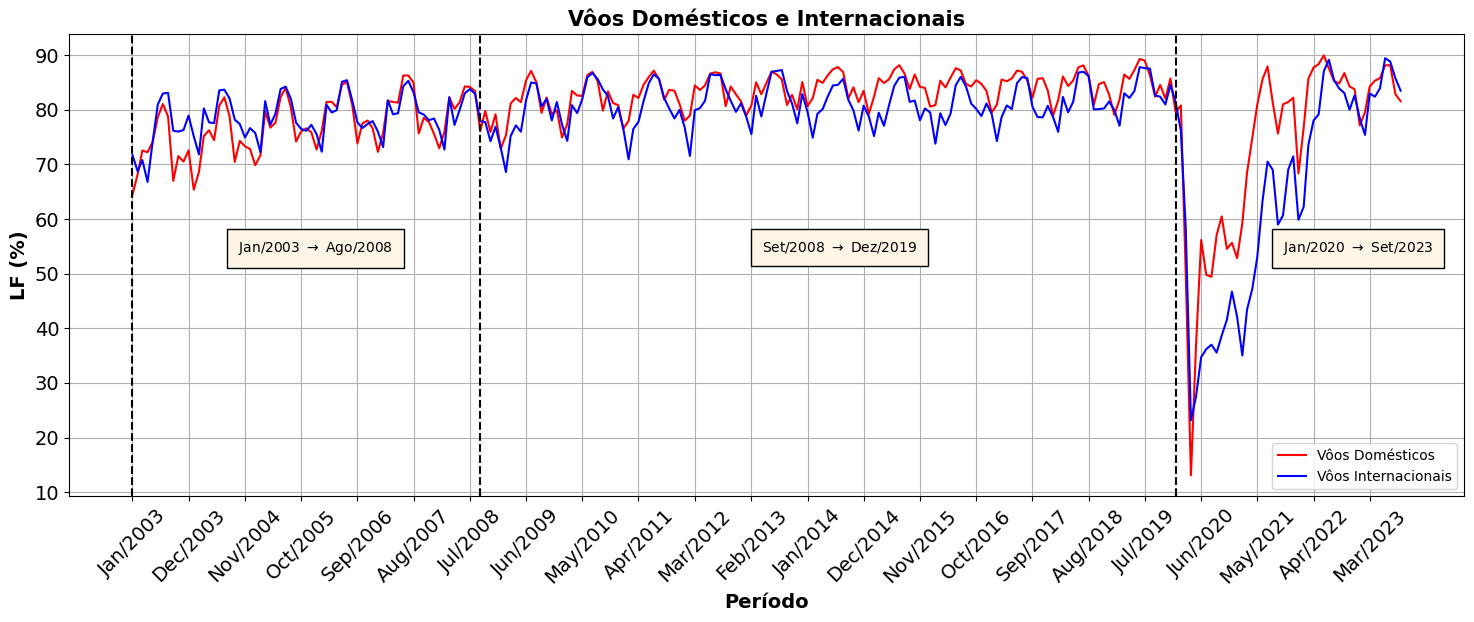

In [4]:
fig, ax = plt.subplots(1,1, figsize=(18, 6))
ax.plot(df['date'], df['Dom_LF'], label ='Vôos Domésticos', color='red')
ax.plot(df['date'], df['Int_LF'], label ='Vôos Internacionais', color='blue')

first_date = pd.Timestamp('2003-01-01')
second_date = pd.Timestamp('2008-09-01')
third_date = pd.Timestamp('2020-01-01')

# plt.axvline(first_date,  color='r', ls='--', label=fr'First Range Jan/2003 $\rightarrow$ Ago/2008')
# plt.axvline(second_date, color='r', ls='--', label=fr'Second Range Set/2008 $\rightarrow$ Dez/2019')
# plt.axvline(third_date,  color='r', ls='--', label=fr'Third Range Jan/2020 $\rightarrow$ Set/2023')

ax.axvline(first_date,  color='k', ls='--')
ax.axvline(second_date, color='k', ls='--')
ax.axvline(third_date,  color='k', ls='--')


xticks_range = pd.date_range(start='2003-01-01', end='2023-09-01', freq='11MS')
formatted_dates = [date.strftime('%b/%Y') for date in xticks_range]

ax.text(12680, 54, r'Jan/2003 $\rightarrow$ Ago/2008', bbox={'facecolor': 'oldlace', 'alpha': 1, 'pad': 8})
ax.text(15800, 54, r'Set/2008 $\rightarrow$ Dez/2019', bbox={'facecolor': 'oldlace', 'alpha': 1, 'pad': 8})
ax.text(18900, 54, r'Jan/2020 $\rightarrow$ Set/2023', bbox={'facecolor': 'oldlace', 'alpha': 1, 'pad': 8})

ax.set_title('Vôos Domésticos e Internacionais', weight='bold', fontsize=15)
ax.set_xlabel('Período', weight='bold', fontsize=14)
ax.set_ylabel('LF (%)', weight='bold', fontsize=14)
plt.xticks(xticks_range, formatted_dates, rotation=45, fontsize=14)
plt.yticks(fontsize=14)
ax.grid(True)
ax.legend()
plt.show()

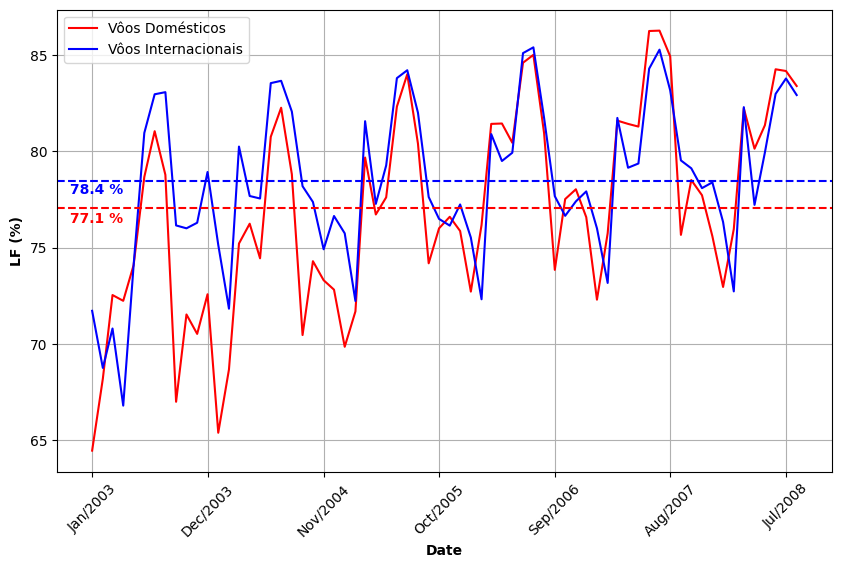

In [5]:
# first period
first_period = df[df['date'] < pd.Timestamp('2008-08-31')]

#plot using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(first_period['date'], first_period['Dom_LF'], label='Vôos Domésticos', color='red')
plt.plot(first_period['date'], first_period['Int_LF'], label='Vôos Internacionais', color='blue')

xticks_range = pd.date_range(start='2003-01-01', end='2008-08-31', freq='11MS')
formatted_dates = [date.strftime('%b/%Y') for date in xticks_range]

plt.axhline(first_period['Dom_LF'].mean(),  color='red', ls='--')
plt.axhline(first_period['Int_LF'].mean(),  color='blue', ls='--')
plt.text(11990, 76.3, f"{round(first_period['Dom_LF'].mean(), 1)} %", weight='bold', color='red')
plt.text(11990, 77.8, f"{round(first_period['Int_LF'].mean(), 1)} %", weight='bold', color='blue')

plt.grid(True)
# plt.title('Vôos entre Jan/2003 e Ago/2008', weight='bold', fontsize=15)
plt.xlabel('Date', weight='bold')
plt.ylabel('LF (%)', weight='bold')
plt.xticks(xticks_range, formatted_dates, rotation=45, fontsize=10)
plt.legend()
plt.show()

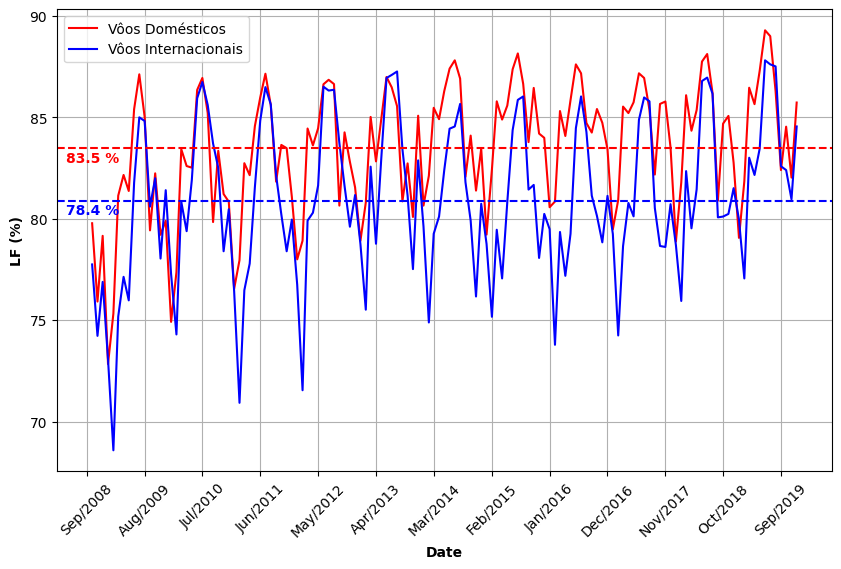

In [6]:
# second period
second_period = df[df['date'] > pd.Timestamp('2008-09-01')]
second_period = second_period[second_period['date'] < pd.Timestamp('2019-12-31')]

#plot using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(second_period['date'], second_period['Dom_LF'], label='Vôos Domésticos', color='red')
plt.plot(second_period['date'], second_period['Int_LF'], label='Vôos Internacionais', color='blue')

plt.axhline(second_period['Dom_LF'].mean(),  color='red', ls='--')
plt.axhline(second_period['Int_LF'].mean(),  color='blue', ls='--')
plt.text(14000, 82.8, f"{round(second_period['Dom_LF'].mean(), 1)} %", weight='bold', color='red')
plt.text(14000, 80.2, f"{round(first_period['Int_LF'].mean(), 1)} %", weight='bold', color='blue')

xticks_range = pd.date_range(start='2008-09-01', end='2019-12-31', freq='11MS')
formatted_dates = [date.strftime('%b/%Y') for date in xticks_range]

plt.grid(True)
# plt.title('Vôos entre Sep/2008 e Dez/2019', weight='bold', fontsize=15)
plt.xlabel('Date', weight='bold')
plt.ylabel('LF (%)', weight='bold')
plt.xticks(xticks_range, formatted_dates, rotation=45, fontsize=10)
plt.legend()
plt.show()

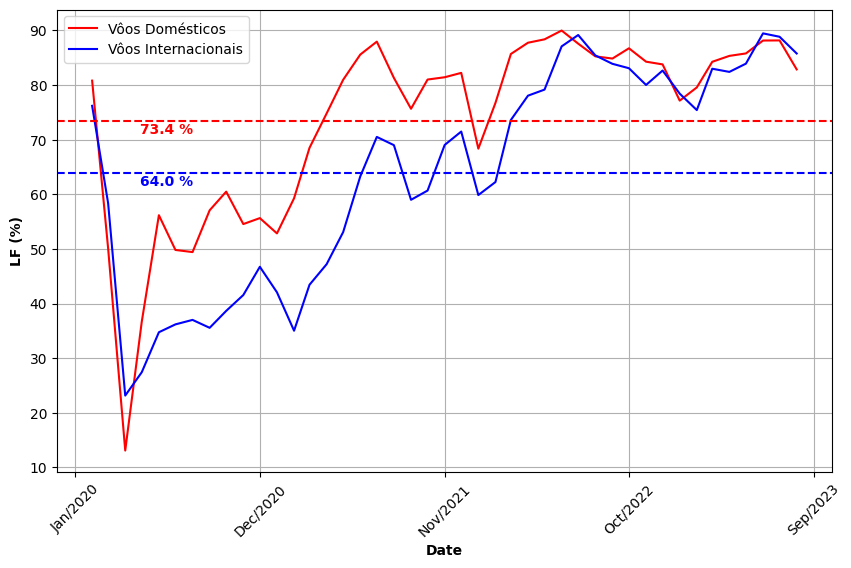

In [7]:
# third period
third_period = df[df['date'] > pd.Timestamp('2020-01-01')]
third_period = third_period[third_period['date'] < pd.Timestamp('2023-09-01')]

#plot using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(third_period['date'], third_period['Dom_LF'], label='Vôos Domésticos', color='red')
plt.plot(third_period['date'], third_period['Int_LF'], label='Vôos Internacionais', color='blue')

plt.axhline(third_period['Dom_LF'].mean(),  color='red', ls='--')
plt.axhline(third_period['Int_LF'].mean(),  color='blue', ls='--')
plt.text(18380, 71.05, f"{round(third_period['Dom_LF'].mean(), 1)} %", weight='bold', color='red')
plt.text(18380, 61.6, f"{round(third_period['Int_LF'].mean(), 1)} %", weight='bold', color='blue')

xticks_range = pd.date_range(start='2020-01-01', end='2023-09-01', freq='11MS')
formatted_dates = [date.strftime('%b/%Y') for date in xticks_range]

plt.grid(True)
# plt.title('Vôos entre Jan/2020 e Sep/2023', weight='bold', fontsize=15)
plt.xlabel('Date', weight='bold')
plt.ylabel('LF (%)', weight='bold')
plt.xticks(xticks_range, formatted_dates, rotation=45, fontsize=10)
plt.legend()
plt.show()

### Train, Val & Test

In [45]:
df_copy = df.copy()

df1 = df_copy[df_copy['Year'] <= 2019] # train & val (82 %)
df2 = df_copy[df_copy['Year'] >= 2020] # test        (18 %)

df1 = pd.concat([df1.iloc[:, -1], df1['LF']], axis=1)
df2 = pd.concat([df2.iloc[:, -1], df2['LF']], axis=1)

In [46]:
df1.shape, df2.shape # train & val -> 204 | test -> 45

((204, 2), (45, 2))

In [77]:
X = pd.concat([df_copy.iloc[:, -1], df_copy['LF']], axis=1)
X = X['LF']
values = pd.DataFrame(X.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
X = dataframe.values
train, test = X[1:len(X)-45], X[len(X)-45:] # testing for 7 values, predictions
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [78]:
X = pd.concat([df_copy.iloc[:, -1], df_copy['LF']], axis=1)
X = X['LF']
series = pd.DataFrame(X.values)
X = series.values
train, test = X[:len(X)-45], X[len(X)-45:]

In [79]:
len(train), len(test)

(204, 45)

In [80]:
# train autoregression
window = 24
model = AutoReg(train, lags=window)
model_fit = model.fit()
coef = model_fit.params

In [81]:
# walk forward over time steps in test
history = train[len(train) - window:]
history = [history[i] for i in range(len(history))]
predictions = list()

In [82]:
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
        
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=80.224770, expected=80.090000
predicted=81.256206, expected=79.580000
predicted=84.851112, expected=51.830000
predicted=76.244931, expected=13.830000
predicted=60.703745, expected=36.020000
predicted=59.479010, expected=54.160000
predicted=61.871382, expected=48.170000
predicted=58.571366, expected=47.650000
predicted=64.706667, expected=53.430000
predicted=68.645116, expected=56.540000
predicted=64.509080, expected=52.070000
predicted=71.595282, expected=53.720000
predicted=68.687021, expected=50.310000
predicted=62.074102, expected=53.830000
predicted=41.405424, expected=63.450000
predicted=28.614362, expected=69.120000
predicted=61.348086, expected=75.360000
predicted=78.064718, expected=81.050000
predicted=77.996943, expected=84.320000
predicted=82.179208, expected=78.670000
predicted=77.246912, expected=72.130000
predicted=76.480183, expected=76.770000
predicted=74.263350, expected=78.870000
predicted=70.227572, expected=79.750000
predicted=66.078984, expected=66.260000


Test RMSE: 14.982


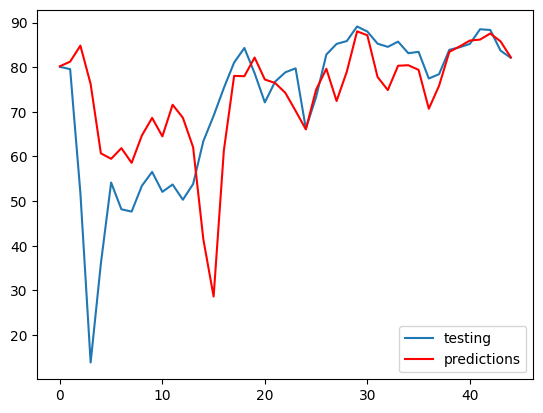

In [83]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
plt.plot(test_y, label='testing')
plt.plot(predictions, color='red', label='predictions')
plt.legend()
plt.show()

In [86]:
# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
        
    return yhat

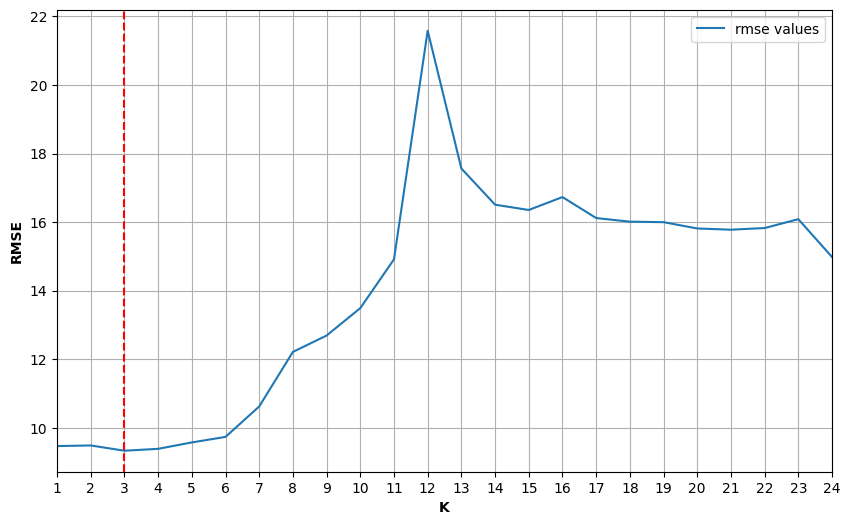

In [87]:
import numpy as np

# train autoregression
rmse_list = []
window_list = []
for i in range(1, 25):
    window = i
    model = AutoReg(train, lags=window)
    model_fit = model.fit()
    coef = model_fit.params

    # walk forward over time steps in test
    history = [train[i] for i in range(len(train))]
    predictions = list()
    for t in range(len(test)):
        yhat = predict(coef, history)
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
    rmse = sqrt(mean_squared_error(test, predictions))
    window_list.append(window)
    rmse_list.append(rmse)

plt.figure(figsize=(10, 6))
plt.plot(window_list, rmse_list, label='rmse values')
plt.xlabel('K', weight='bold')
plt.ylabel('RMSE', weight='bold')
plt.axvline(x=window_list[rmse_list.index(min(rmse_list))], linestyle='--', c='red')
plt.xlim((1, 24))
plt.grid()
plt.xticks(np.arange(1, 25))
plt.legend()
plt.show()

In [62]:
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-45], X[len(X)-45:] # testing for 7 values, predictions
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [63]:
train.shape, test.shape

((203, 2), (45, 2))

In [66]:
# persistence model
def model_persistence(x):
    return x

# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
    
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 87.929


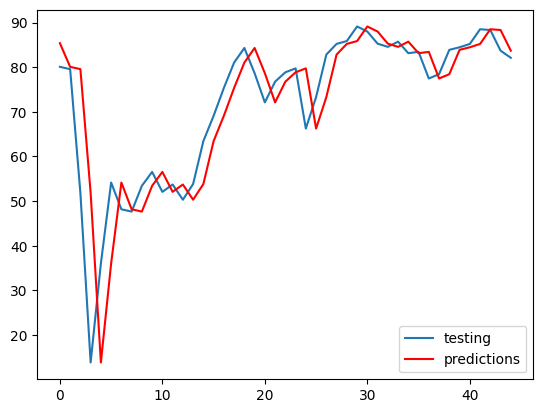

In [67]:
# plot predictions vs expected
plt.plot(test_y, label='testing')
plt.plot(predictions, color='red', label='predictions')
plt.legend()
plt.show()

In [25]:
df1 = df1['LF']
df2 = df2['LF']

valuesdf1 = pd.DataFrame(df1.values)
valuesdf2 = pd.DataFrame(df2.values)

dataframe1 = pd.concat([valuesdf1.shift(1), valuesdf1], axis=1)
dataframe1.columns = ['t-1', 't+1']

dataframe2 = pd.concat([valuesdf2.shift(1), valuesdf2], axis=1)
dataframe2.columns = ['t-1', 't+1']

In [37]:
X1 = dataframe1.values
X2 = dataframe2.values

train, test = X1[1:], X2[1:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [38]:
# train autoregression
model = AutoReg(train, lags=6)
model_fit = model.fit()

TypeError: can only concatenate list (not "str") to list

In [16]:
# df_c = df.copy()
# df = pd.concat([df_c.iloc[:, -1], df_c['LF']], axis=1)
# plt.plot(df['LF'])
# plt.xticks(rotation=45)
# plt.show()

In [17]:
# df = df['LF']
# df.head()

In [11]:
values = pd.DataFrame(df.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']

dataframe.head()

,t-1,t+1
0,NaN,66.20
1,66.20,68.31
2,68.31,72.12
3,72.12,71.02
4,71.02,74.07


In [12]:
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:] # testing for 7 values, predictions
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

249

In [24]:
# df['time'] = (df.index.values + 0.5) / 12

In [25]:
# range1 = df[df['Year'] <= 2019] # train & val (82 %)
# range2 = df[df['Year'] >= 2020] # test        (18 %)

# range1.shape, range2. shape

In [26]:
# x_train = list(range1['time'])
# y_train = list(range1['LF'])

# x_test = list(range2['time'])
# y_test = list(range2['LF'])